# **Exercises**
A dataset of three input variables RED, GREEN, and BLUE as well as an output variable
LIGHT_OR_DARK_FONT_IND is provided [here](https://bit.ly/3imidqa). It will be used to predict whether a
light/dark font (0/1 respectively) will work for a given background color (specified by RGB
values).
1. Perform a logistic regression on the preceding data, using three-fold cross-validation
and accuracy as your metric.
2. Produce a confusion matrix comparing the predictions and actual data.
3. Pick a few different background colors (you can use an RGB tool like this one) and see
if the logistic regression sensibly chooses a light (0) or dark (1) font for each one.
4. Based on the preceding exercises, do you think logistic regression is effective for
predicting a light or dark font for a given background color?

In [ ]:
dataset=pd.read_csv("https://bit.ly/3imidqa", delimiter=",")
dataset.head()

,RED,GREEN,BLUE,LIGHT_OR_DARK_FONT_IND
0,0,0,0,0
1,0,0,128,0
2,0,0,139,0
3,0,0,205,0
4,0,0,238,0


#### **Exercise 1:**
___

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, cross_val_score
# Load the data
df = pd.read_csv("https://bit.ly/3imidqa", delimiter=",")
X = df.values[:, :-1]
Y = df.values[:, -1]
kfold = KFold(n_splits=3, shuffle=True) # n_splits means how many folds, we are using 3 fold.
model = LogisticRegression(penalty='none') # you could use 'elasticnet','l1', or 'l2' as penalty.
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy Mean: %.3f (stdev=%.3f)" % (results.mean(),\
results.std()))

Accuracy Mean: 1.000 (stdev=0.000)


#### **Exercise 2**
___

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
# Load the data
df = pd.read_csv("https://bit.ly/3imidqa", delimiter=",")
# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1]
# Extract output column (all rows, last column)\
Y = df.values[:, -1]
model = LogisticRegression(solver='liblinear')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
test_size=.33)
model.fit(X_train, Y_train)
prediction = model.predict(X_test)
matrix = confusion_matrix(y_true=Y_test, y_pred=prediction)
print(matrix)

[[168   8]
 [  1 267]]


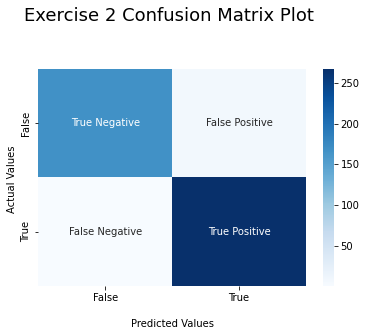

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
labels = ['True Negative','False Positive','False Negative','True Positive']
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Exercise 2 Confusion Matrix Plot \n\n',fontsize=18)
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

#### **Exercise 3**
___

In [120]:
import numpy as np
import pandas as pd
import ipywidgets as widgets
from IPython.display import display,Latex
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from ipywidgets import interact, interactive, fixed, interact_manual

# Load the data
df = pd.read_csv("https://bit.ly/3imidqa", delimiter=",")
# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1]
# Extract output column (all rows, last column)
Y = df.values[:, -1]
model = LogisticRegression(solver='liblinear')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,\
                                                    test_size=.33)
model.fit(X_train, Y_train)
prediction = model.predict(X_test)

def colrs(r,g,b):
  x = model.predict(np.array([[int(r), int(g), int(b)]]))
  if model.predict(np.array([[int(r), int(g), int(b)]]))[0] == 0.0:
    return display("Predicted Font Color: LIGHT")
  else:
    return display("Predicted Font Color: DARK")

def slider_maker(description):
  slider = widgets.IntSlider(
      value=0,
      min=0,
      max=255,
      step=1,
      description=description,
      disabled=False,
      continuous_update=False,
      orientation='horizontal',
      readout=True,
      readout_format='d'
  )
  return slider
w = interactive(colrs,r=slider_maker('Red'),g=slider_maker('Green'),b=slider_maker('Blue'))
display("Choose RGB combinations from the sliders below: ")
display(w)

'Choose RGB combinations from the sliders below: '

interactive(children=(IntSlider(value=0, continuous_update=False, description='Red', max=255), IntSlider(value…

#### **Exercise 4**
___
Yes, the logistic regression is very effective at predicting light or dark
fonts for a given background color. Not only is the accuracy extremely
high, but the confusion matrix has high numbers in the top-left to
bottom-right diagonal with lower numbers in the other cells.